#**Spotify_Audio_Analysis**

#>> Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dataset Overview
This section loads and previews the dataset.

In [4]:
# Load dataset
df = pd.read_csv('/content/Spotify_2000-2019_trendingdata.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# 2. Basic Exploration Functions
The basic structure and information about the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [40]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

# 3. Data Cleaning
Check for missing values and duplicates, and clean the dataset.

In [8]:
df.isnull().sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


In [9]:
df.duplicated().sum()

np.int64(59)

In [10]:
df.drop_duplicates(inplace=True)

# 4. Data Filtering
Filtering data based on conditions.

In [41]:
# Filter by specific genre
df[df['genre'] == 'pop']

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.0328,0.048200,0.3600,0.808,139.066,pop
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,268863,False,1999,56,0.745,0.958,7,-9.664,1,0.0287,0.0813,0.324000,0.5330,0.960,129.962,pop
12,Bomfunk MC's,Freestyler,306333,False,2000,55,0.822,0.922,11,-5.798,0,0.0989,0.0291,0.325000,0.2520,0.568,163.826,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock),206186,True,2019,64,0.746,0.787,4,-6.373,1,0.1200,0.2140,0.000000,0.0669,0.607,95.005,pop
1990,Sam Smith,How Do You Sleep?,202204,False,2019,73,0.477,0.682,1,-4.931,0,0.0925,0.1530,0.000000,0.0763,0.345,110.567,pop
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop


# 5. Grouping
Group data to find patterns.

In [12]:
df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

,popularity
genre,
"pop, rock, Folk/Acoustic",79.000000
"Folk/Acoustic, pop",78.000000
"rock, pop, metal, Dance/Electronic",76.000000
"hip hop, rock, pop",75.000000
metal,72.000000
"hip hop, latin, Dance/Electronic",72.000000
easy listening,72.000000
"rock, Folk/Acoustic, pop",71.000000
"rock, metal",70.527778


# 6. Sorting
Sort values for better readability and comparison.

In [13]:
df.sort_values(by='popularity', ascending=False).head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1512,The Neighbourhood,Daddy Issues,260173,False,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"
1709,Ed Sheeran,Perfect,263400,False,2017,85,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,pop


# 7. Aggregations
Use statistical functions to summarize the dataset.

In [14]:
df.agg({
    'popularity': ['min', 'max', 'mean', 'var', 'std'],
    'danceability': ['min', 'max', 'mean'],
    'energy': ['min', 'max', 'mean']
})

,popularity,danceability,energy
min,0.000000,0.129000,0.054900
max,89.000000,0.975000,0.999000
mean,59.633179,0.667814,0.721549
var,462.295270,NaN,NaN
std,21.501053,NaN,NaN


# 8. Query Solving
Solve 20 queries to gain insights from the dataset.

In [15]:
# Query 1
df['genre'].nunique()

59

In [16]:
# Query 2
df['artist'].nunique()

835

In [17]:
# Query 3
df['year'].nunique()

23

In [18]:
# Query 4
df['popularity'].mean()

np.float64(59.63317877382792)

In [19]:
# Query 5
df[df['popularity'] == df['popularity'].max()]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


In [20]:
# Query 6
df[df['popularity'] == df['popularity'].min()]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
59,Oasis,Go Let It Out,278666,False,2000,0,0.408,0.849,2,-5.631,1,0.0333,0.01360,0.000025,0.5600,0.628,84.192,"Folk/Acoustic, rock"
62,Mariah Carey,Against All Odds (Take A Look at Me Now) (feat...,199480,False,2011,0,0.471,0.514,1,-5.599,1,0.0315,0.58400,0.000000,0.1030,0.373,117.338,"pop, R&B"
126,Jennifer Lopez,Ain't It Funny,246160,False,2001,0,0.707,0.869,5,-4.525,0,0.0481,0.10400,0.000121,0.0813,0.621,99.825,"hip hop, pop, R&B"
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.00284,0.074600,0.0685,0.275,129.006,Dance/Electronic
182,Musiq Soulchild,Love,304666,False,2000,0,0.569,0.385,1,-9.919,0,0.0499,0.34200,0.000000,0.0876,0.339,99.738,"pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,CNCO,Reggaetón Lento (Remix),188786,False,2017,0,0.623,0.909,4,-3.079,0,0.0758,0.15800,0.000000,0.0972,0.651,93.984,"pop, latin"
1794,Shawn Mendes,Mercy,208733,False,2017,0,0.561,0.674,4,-4.882,0,0.0818,0.11800,0.000000,0.1110,0.383,148.127,pop
1850,Loud Luxury,Body (feat. brando),163216,False,2017,0,0.752,0.764,1,-4.399,1,0.0380,0.04760,0.000094,0.0543,0.582,121.958,"pop, Dance/Electronic"
1913,NLE Choppa,Shotta Flow (feat. Blueface) [Remix],176631,True,2019,0,0.894,0.511,2,-4.768,1,0.4200,0.02510,0.000000,0.1400,0.568,120.080,hip hop


In [21]:
# Query 7
df['genre'].value_counts().head(5)

,count
genre,
pop,416
"hip hop, pop",267
"hip hop, pop, R&B",236
"pop, Dance/Electronic",216
"pop, R&B",172


In [22]:
# Query 8
df[df['danceability'] > 0.8].shape[0]

337

In [23]:
# Query 9
df[df['energy'] > 0.9].shape[0]

220

In [24]:
# Query 10
df.groupby('genre')['danceability'].mean().sort_values(ascending=False).head(5)

,danceability
genre,
"hip hop, country",0.8470
"World/Traditional, hip hop",0.8070
"rock, Folk/Acoustic, easy listening",0.8010
"pop, R&B, Dance/Electronic",0.7945
"rock, R&B, Folk/Acoustic, pop",0.7910


In [25]:
# Query 11
df.groupby('genre')['energy'].mean().sort_values(ascending=False).head(5)

,energy
genre,
"rock, easy listening",0.970000
"pop, easy listening, Dance/Electronic",0.968000
"country, latin",0.935000
"rock, Folk/Acoustic, easy listening",0.876000
"rock, metal",0.873194


In [26]:
# Query 12
df[df['tempo'] > 120].shape[0]

988

In [27]:
# Query 13
df[df['valence'] > 0.7].shape[0]

563

In [28]:
# Query 14
df.groupby('key')['popularity'].mean().sort_values(ascending=False)

,popularity
key,
3,63.271186
8,62.017751
4,60.837398
9,60.776316
1,60.408560
7,59.912371
10,59.548387
11,58.817708
5,58.528736


In [29]:
# Query 15
df.groupby('mode')['popularity'].mean()

,popularity
mode,
0,60.098039
1,59.257914


In [30]:
# Query 16
df[df['instrumentalness'] > 0.5].shape[0]

22

In [31]:
# Query 17
df[df['liveness'] > 0.8].shape[0]

8

In [32]:
# Query 18
df['duration_ms'].mean() / 60000

np.float64(3.809916228748068)

In [33]:
# Query 19
df['speechiness'].max()

0.576

In [34]:
# Query 20
df[df['speechiness'] == df['speechiness'].max()]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
736,MiMS,This Is Why I'm Hot,253706,True,2007,59,0.621,0.6,8,-6.349,1,0.576,0.277,0.0,0.495,0.485,80.021,"hip hop, pop"


# 9. Data Visualization
Visualize the dataset to uncover trends and distributions.

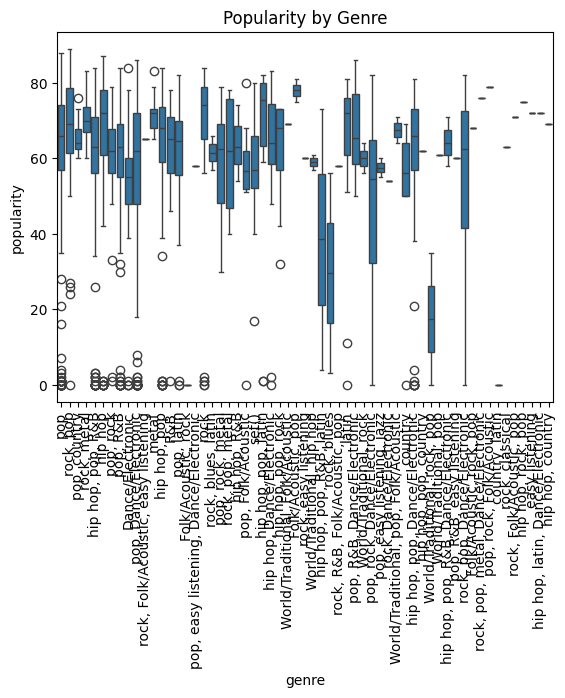

In [35]:
sns.boxplot(x='genre', y='popularity', data=df)
plt.xticks(rotation=90)
plt.title('Popularity by Genre')
plt.show()

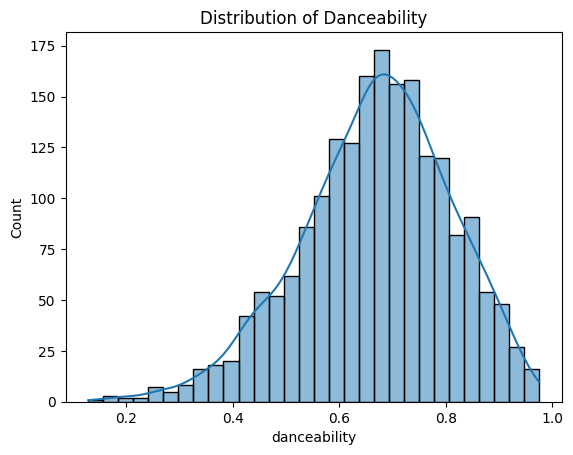

In [36]:
sns.histplot(df['danceability'], bins=30, kde=True)
plt.title('Distribution of Danceability')
plt.show()

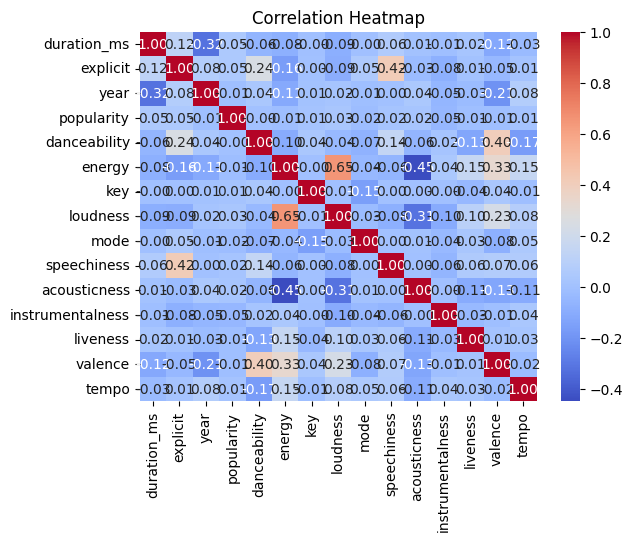

In [37]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

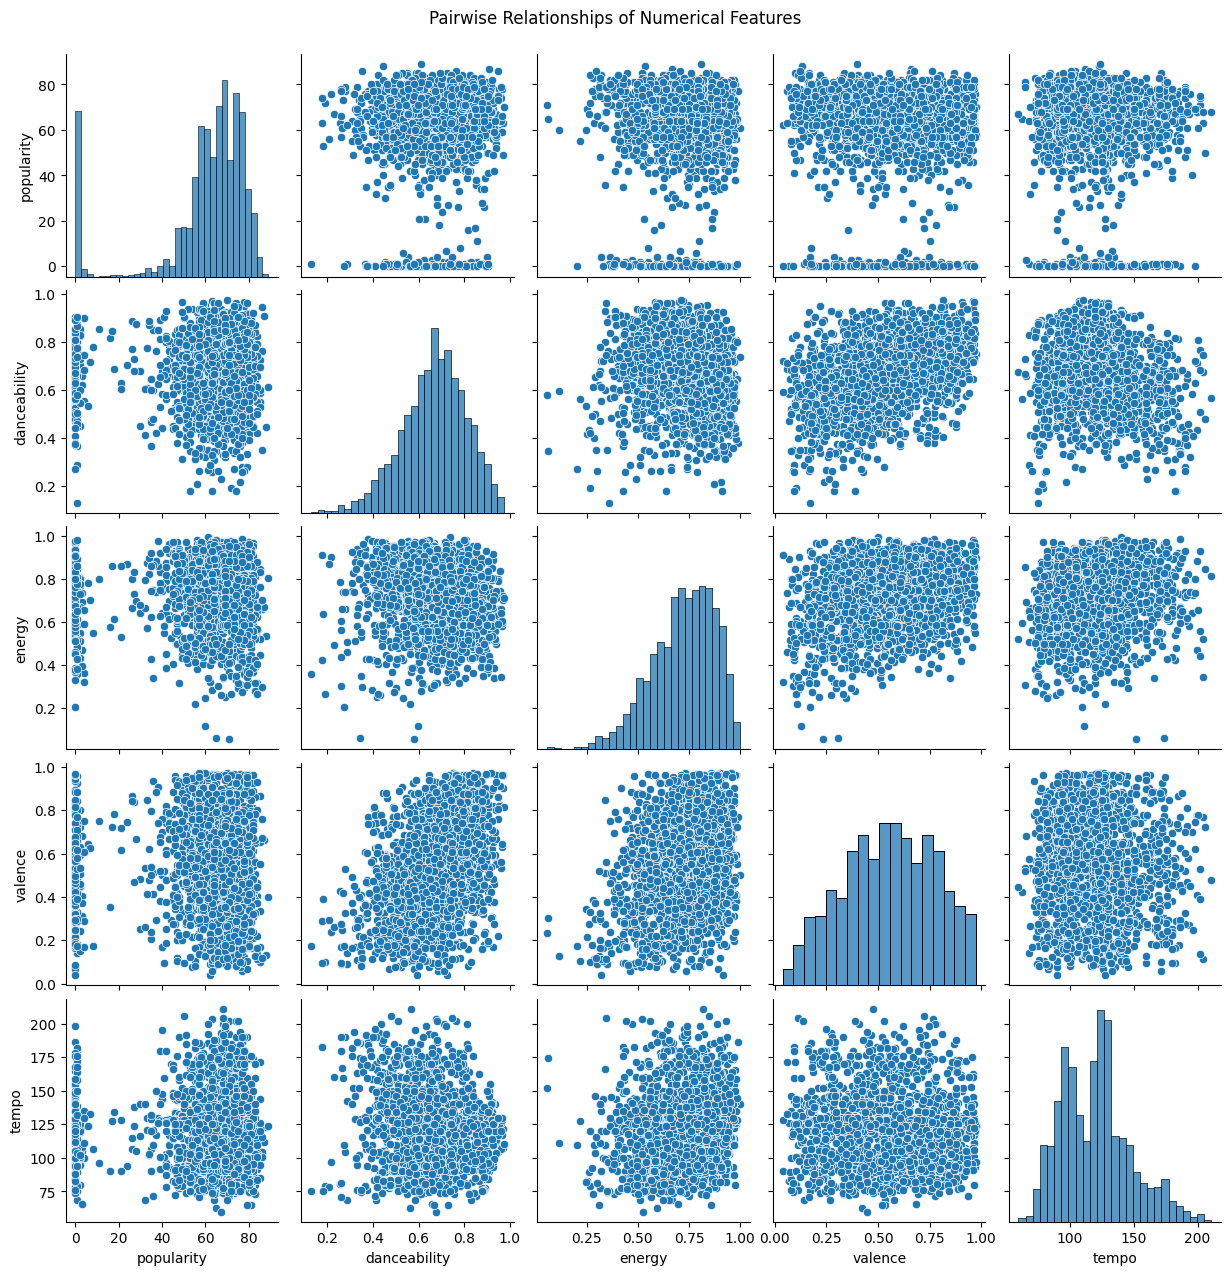

In [39]:
# Pairplot for a subset of numerical features to see pairwise relationships
numerical_features = ['popularity', 'danceability', 'energy', 'valence', 'tempo']
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()



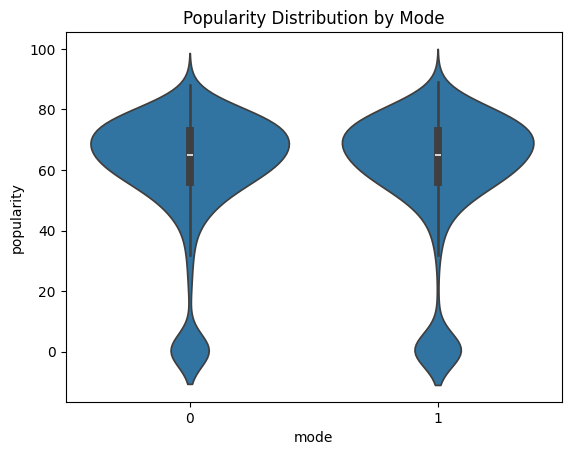

In [ ]:
# Violin plot for popularity distribution by mode
sns.violinplot(x='mode', y='popularity', data=df)
plt.title('Popularity Distribution by Mode')
plt.show()



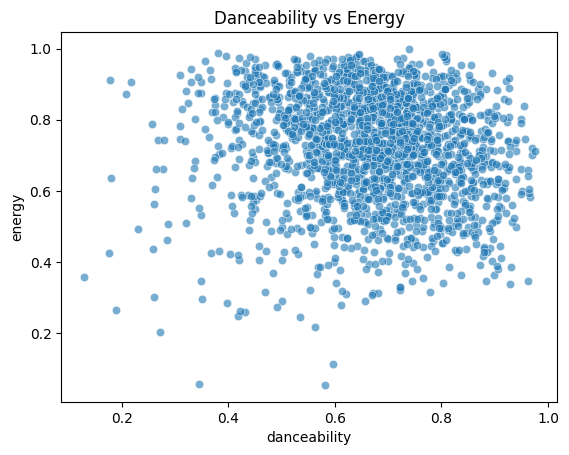

In [ ]:
# Scatter plot of danceability vs energy
sns.scatterplot(x='danceability', y='energy', data=df, alpha=0.6)
plt.title('Danceability vs Energy')
plt.show()



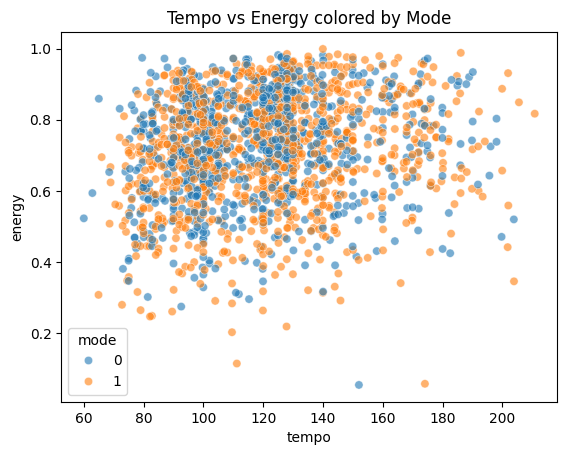

In [ ]:
# Scatter plot of tempo vs energy, colored by mode
sns.scatterplot(x='tempo', y='energy', hue='mode', data=df, alpha=0.6)
plt.title('Tempo vs Energy colored by Mode')
plt.show()



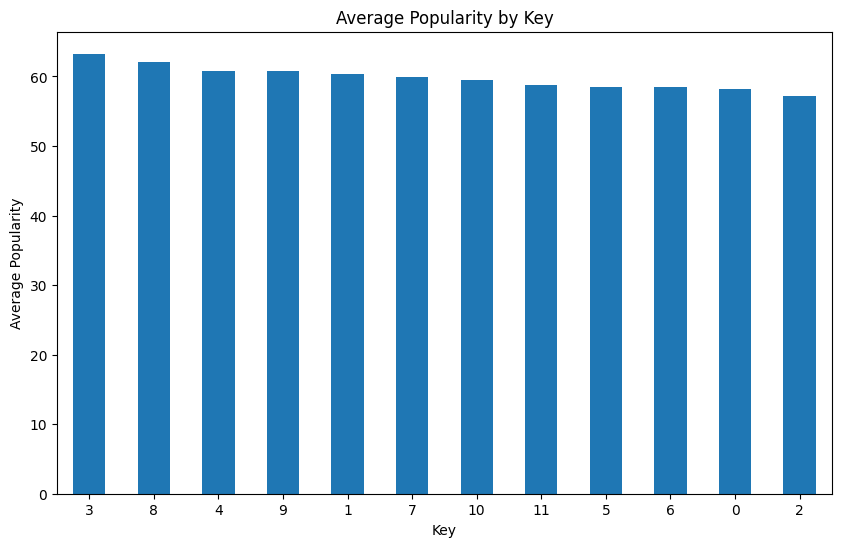

In [ ]:
# Bar plot of average popularity by key
plt.figure(figsize=(10, 6))
df.groupby('key')['popularity'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Popularity by Key')
plt.xlabel('Key')
plt.ylabel('Average Popularity')
plt.xticks(rotation=0)
plt.show()

